In [1]:
import pandas as pd 
import spotipy 
import numpy as np
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Spotify Charts - Top 200
#### Import du fichier CSV

In [2]:
csv1 = pd.read_csv('csv/regional-global-daily-2018-11-28.csv', skiprows=1)
csv1["trackid"]=csv1.URL.str.replace("https://open.spotify.com/track/","")

#### Récupération des données: Track Name, Artist Name, Streams

In [3]:
df_tracks = csv1.drop(['URL'], axis=1)
df_tracks = df_tracks.rename(columns={"trackid": "id"})
df_tracks.head(3)

,Position,Track Name,Artist,Streams,id
0,1,"thank u, next",Ariana Grande,5675141,2rPE9A1vEgShuZxxzR2tZH
1,2,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,4270342,4w8niZpiMy6qz1mntFA5uM
2,3,KIKA (feat. Tory Lanez),6ix9ine,3559754,6Gy7rXB6Ku5vIWC7WGWsl3


## API Spotify
#### Récupération du token via l'API Spotify

In [4]:
clientid = "e4ce21fca19640adb883d246b5d90475"
clientsecret ="8654ab7aafc44ac8985f316cefe913b1"
client_credentials_manager = SpotifyClientCredentials(clientid,clientsecret )
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#### Récupération des features, popularité et genre de la musique à partir de son ID

In [5]:
ids1 = []
ids_pop1 = []
genres_artist1 = []
for i in csv1['trackid'][0:100]:
    ids1.append(i)
    ids_pop1.append(sp.track(i)['popularity'])
    id_artist = sp.track(i)['artists'][0]['id']
    genres_artist1.append(sp.artist(id_artist)['genres'])
features1 = sp.audio_features(ids1)
df1 = pd.DataFrame(features1)
df1['popularity'] = ids_pop1
df1['genres'] = genres_artist1

ids2 = []
ids_pop2 = []
genres_artist2 = []
for i in csv1['trackid'][101:200]:
    ids2.append(i)
    ids_pop2.append(sp.track(i)['popularity'])
    id_artist = sp.track(i)['artists'][0]['id']
    genres_artist2.append(sp.artist(id_artist)['genres'])
features2 = sp.audio_features(ids2) 
df2 = pd.DataFrame(features2)
df2['popularity'] = ids_pop2
df2['genres'] = genres_artist2

df_features = df1.append(df2)
df_features = df_features[['id', 'popularity', 'genres', 'acousticness', 'danceability' , 'duration_ms', 'energy',
                   'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
                   'speechiness', 'tempo', 'time_signature', 'valence']]

retrying ...1secs
retrying ...4secs
retrying ...1secs


## Merge des données

In [6]:
df_top_200_charts_11_week1 = df_tracks.merge(df_features, on='id')
df_top_200_charts_11_week1 = df_top_200_charts_11_week1.drop(['Position', 'id'], axis=1)
df_top_200_charts_11_week1.head(3)

,Track Name,Artist,Streams,popularity,genres,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,"thank u, next",Ariana Grande,5675141,100,"[dance pop, pop, post-teen pop]",0.280,0.724,207333,0.647,0.000000,1,0.1020,-5.642,1,0.0658,106.960,4,0.435
1,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,4270342,99,"[dance pop, edm, electronic trap, pop, tropica...",0.153,0.841,212500,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591
2,KIKA (feat. Tory Lanez),6ix9ine,3559754,77,[emo rap],0.128,0.745,136032,0.715,0.000000,1,0.1820,-3.368,0,0.2450,94.513,4,0.342


-------

## Statistiques descriptives

In [7]:
df=df_top_200_charts_11_week1.copy()
df.describe()

,Streams,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000
mean,1.230377e+06,83.713568,0.257927,0.691266,200373.618090,0.624598,0.008234,5.361809,0.174883,-6.287749,0.61809,0.114323,121.224357,3.954774,0.485537
std,7.354124e+05,8.258046,0.249922,0.137207,44037.060874,0.158684,0.043534,3.540494,0.135513,2.419844,0.48708,0.099282,28.924520,0.231300,0.206217
min,6.026170e+05,41.000000,0.000282,0.240000,94246.000000,0.104000,0.000000,0.000000,0.051500,-16.485000,0.00000,0.023200,64.934000,3.000000,0.039000
25%,7.352155e+05,80.000000,0.055100,0.615500,179288.500000,0.532000,0.000000,2.000000,0.098800,-7.452000,0.00000,0.044350,96.037000,4.000000,0.341500
50%,9.742100e+05,86.000000,0.172000,0.703000,200560.000000,0.642000,0.000000,6.000000,0.119000,-5.991000,1.00000,0.069400,119.705000,4.000000,0.473000
75%,1.455188e+06,88.500000,0.374000,0.775500,217873.500000,0.740000,0.000014,8.000000,0.195000,-4.556000,1.00000,0.153000,143.527000,4.000000,0.634000
max,5.675141e+06,100.000000,0.979000,0.964000,417920.000000,0.909000,0.353000,11.000000,0.776000,-1.948000,1.00000,0.530000,202.082000,5.000000,0.947000


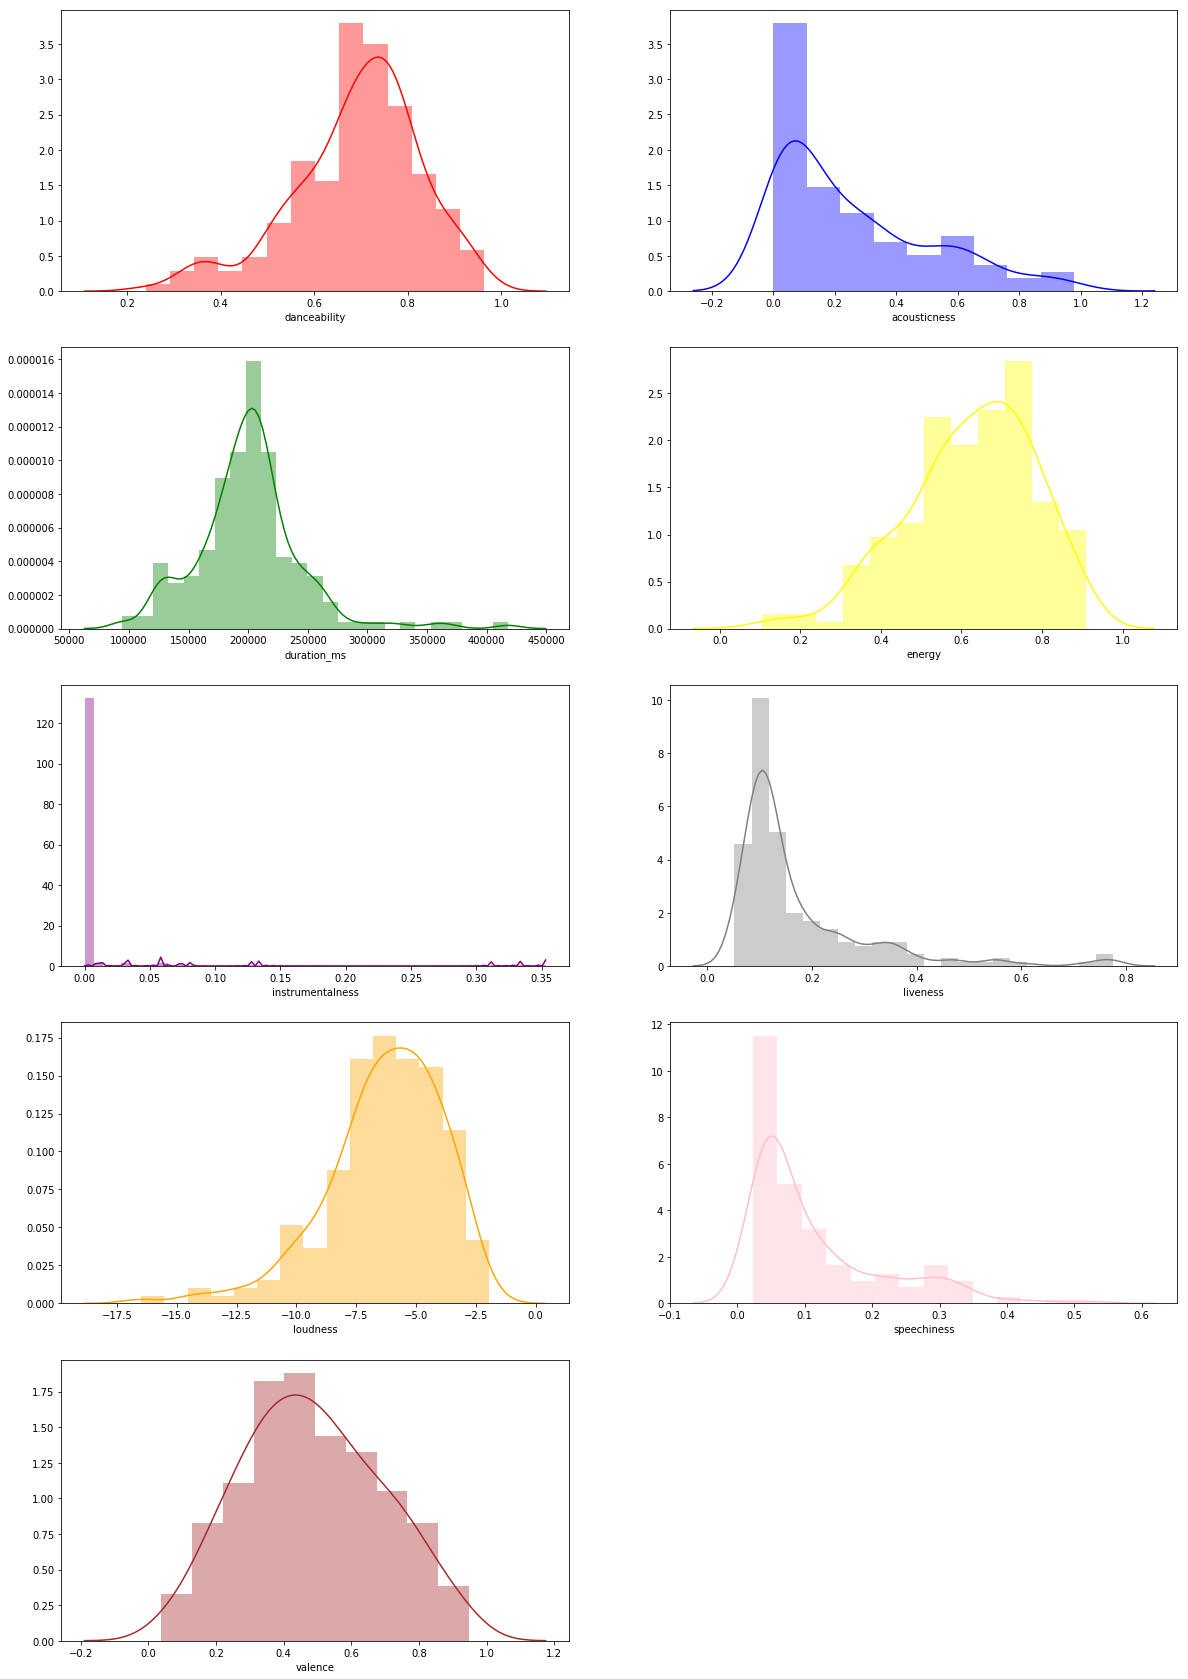

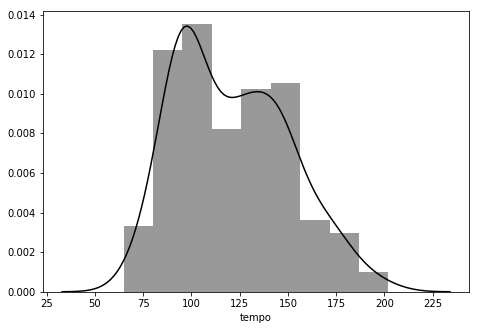

In [8]:
#affichage des histogrammes des variables quantitatives
quant_var = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo','valence']

sns.set_palette('colorblind')

plt.figure(figsize=(20,30))

plt.subplot(521)
sns.distplot(df['danceability'],color='red')

plt.subplot(522)
sns.distplot(df['acousticness'],color='blue')

plt.subplot(523)
sns.distplot(df['duration_ms'],color='green')

plt.subplot(524)
sns.distplot(df['energy'],color='yellow')

plt.subplot(525)
sns.distplot(df['instrumentalness'],color='purple')

plt.subplot(526)
sns.distplot(df['liveness'],color='gray')

plt.subplot(527)
sns.distplot(df['loudness'],color='orange')

plt.subplot(528)
sns.distplot(df['speechiness'],color='pink')

plt.subplot(529)
sns.distplot(df['valence'],color='brown')

plt.figure(figsize=(26,30))
plt.subplot(531)
sns.distplot(df['tempo'],color='black')


plt.show()

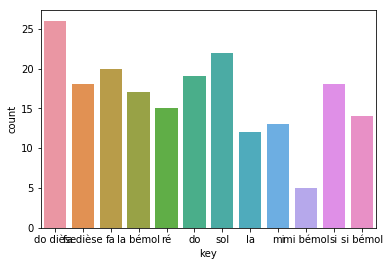

In [9]:
#histogramme des variables qualitatives
qual_var = ['mode', 'time_signature']

gammes = {0.0: 'do', 1.0: 'do dièse', 2.0: 'ré', 3.0: 'mi bémol', 4.0: 'mi', 5.0: 'fa', 6.0: 'fa dièse', 7.0: 'sol', 8.0: 'la bémol', 9.0: 'la', 10.0: 'si bémol', 11.0: 'si'}
df['key'] = df['key'].map(gammes)
sns.countplot(x = 'key', data=df)

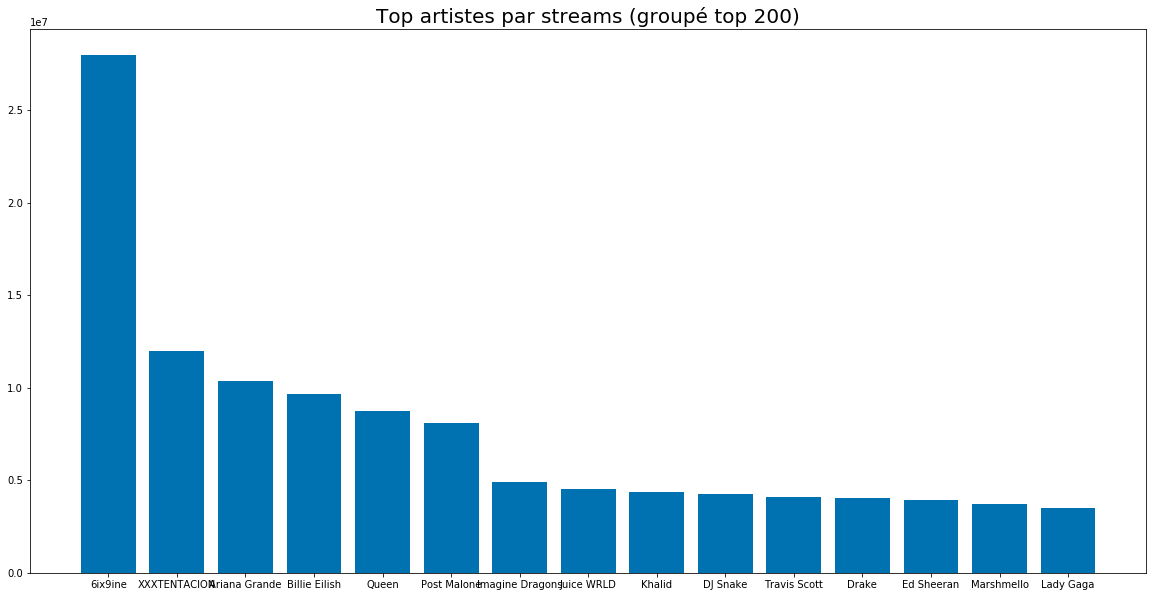

In [10]:
# barplot top artists vs streams

from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
import numpy as np
from matplotlib import animation
from IPython.display import HTML


df_bis = df.groupby('Artist')['Artist', 'Streams'].sum().sort_values(by='Streams', ascending=False)
df_bis = df_bis.reset_index()

fig = plt.figure(figsize=(20,10))
x = df_bis.Artist.head(15)
y = df_bis.Streams.head(15)
plt.bar(x, y)
plt.title('Top artistes par streams (groupé top 200)', fontsize=20)
plt.show()

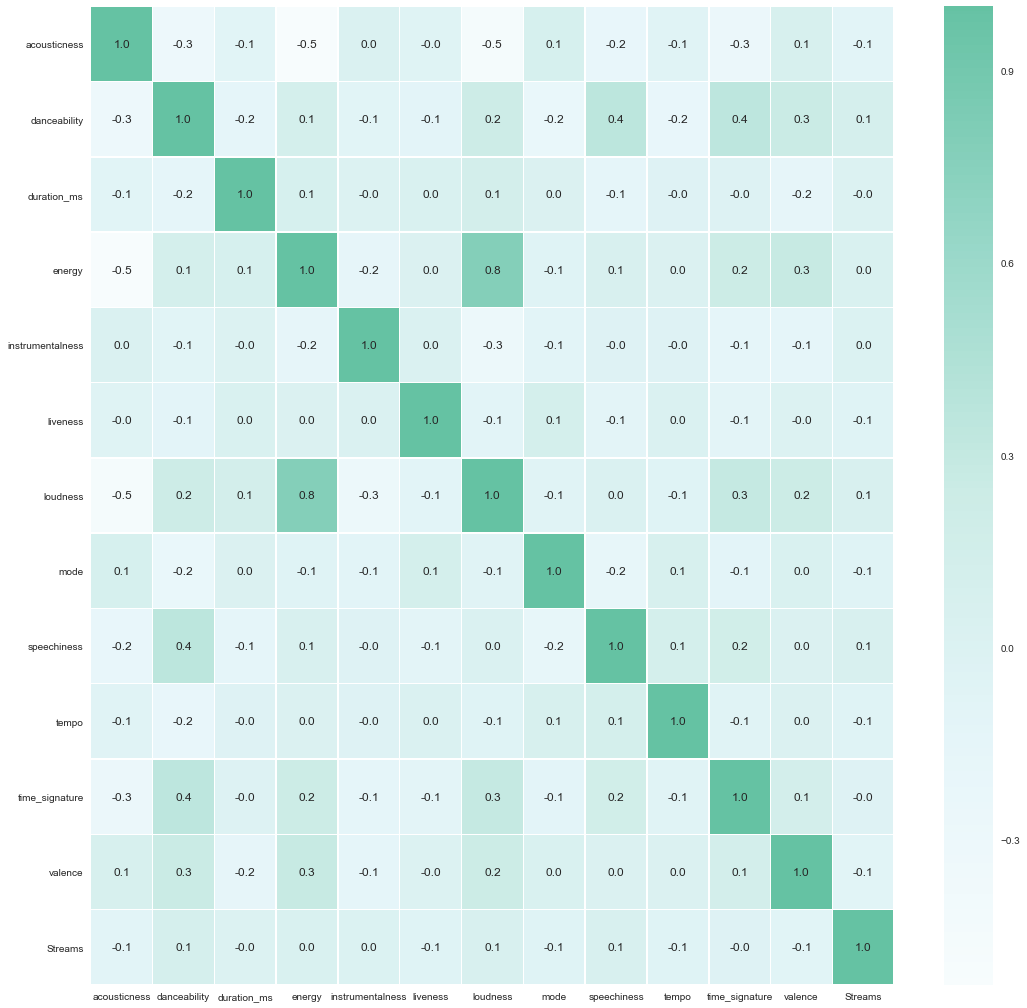

In [11]:
#%%Corrélation des variables entre elles

features = ['acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'valence','Streams']

sns.set(style="white")
df2 = df[features]
f,ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df2.corr(), annot=True, linewidths=.5, fmt= '.1f', center= 1, ax= ax, cmap="BuGn")

In [12]:
cols=['acousticness','danceability','duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature', 'valence']
X_data = df_top_200_charts_11_week1[cols].values

Y_data = df_top_200_charts_11_week1["Streams"].values

In [13]:
X_data.shape

(199, 12)

In [14]:
permutation = np.random.permutation(len(X_data[:,0]))
permutation = np.random.permutation(len(X_data[:,0]))
X_data_train = X_data[permutation[0:150],:]
Y_data_train = Y_data[permutation[0:150]]
X_data_test = X_data[permutation[150:],:]
Y_data_test = Y_data[permutation[150:]]

In [15]:
Y_train_ones = np.where(Y_data_train> 2.5E6,np.ones(len(Y_data_train)),np.zeros(len(Y_data_train)))
Y_test_ones = np.where(Y_data_test  > 2.5E6,np.ones(len(Y_data_test )),np.zeros(len(Y_data_test )))

In [16]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_data_train, Y_train_ones) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
neigh.score(X_data_test,Y_test_ones)

0.8775510204081632

## Test sur un dataset de 1000 données issu des derniers mois

In [18]:
df2 = pd.read_pickle("csv/dfall.pkl")
cols=['acousticness','danceability','duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness',
       'speechiness', 'tempo', 'time_signature', 'valence']
X_data2 = df2[cols].values
Y_data2 = df2["Streams"].values
Y_test_ones2 = np.where(Y_data2  > 2.5E6,np.ones(len(Y_data2  )),np.zeros(len(Y_data2  )))
print(neigh.score(X_data2,Y_test_ones2))

0.9328571428571428


## RandomForestClassifier pour voir les importances des features

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data2, Y_test_ones2, test_size=0.20, random_state=42)

## Gridsearch pour avoir le meilleur tree

In [21]:
param_grid = {
    'n_estimators': [100, 200,300,400],
    'max_depth':[5,10,20, 30]
}
gd = GridSearchCV(clf, param_grid, cv=2)
gd.fit(X_train, y_train)
gd.best_score_
gd.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
clf2=gd.best_estimator_
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
score=clf2.score(X_test,y_test)
print(score)

0.9392857142857143


## Plot de l'importance des features pour le futur hit
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.


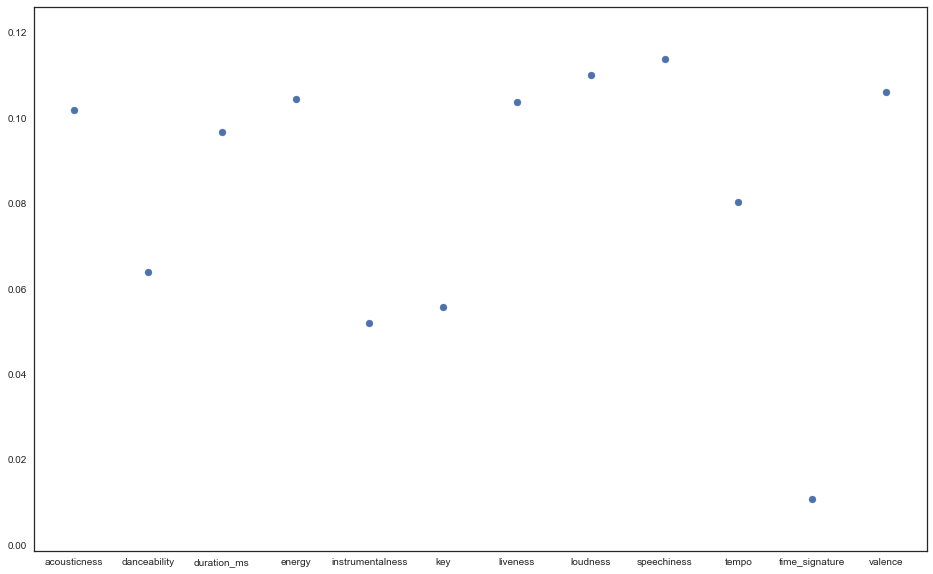

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.scatter(cols,clf2.feature_importances_)
plt.show()